# Dataset2 - EDA

In [2]:
#initial libraries
import numpy as np
import pandas as pd
from reading_data_helper_functions import read_dataset_file, get_head_with_pandas
from eda_helper_functions import get_dataframe_info, plot_class_count_bar_graph

#second set of libraries
import seaborn as sns
import matplotlib.pyplot as plt

#third set of libraries
from sklearn.preprocessing import StandardScaler

Read in the data file.

In [3]:
filename = "creditcard.csv"

dataset = read_dataset_file(filename) #helper function
get_head_with_pandas(dataset) #helper function

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Features of the Dataset

#### Prinicple Components
- The data set contains only numerical data which is the result of PCA transformation.
- Features such as V1, V2 ... V28 are the principle components and are labelled as such due to confidentiality.

#### Defined Components
The features such as the following were not transformed:
- 'Time' was recorded in seconds elapsed between each transaction
- 'Amount' was recorded as transaction amount 

#### Target Feature
Feature 'Class' is response variable and it takes value 1 in case of fraud and 0 otherwise.

### Getting Description of the Dataframe for 'creditcard.csv'.

#### General Description of Dataframe

In [4]:
get_dataframe_info(dataset, filename) #helper function

Information of the creditcard.csv Data Frame

> Size of Data Frame
(284807, 31)


> General Information on each Column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18 

##### Observation of Dataframe:
- contains 284806 rows (excluding header) and 31 columns of data
- full with no null values on any row or column
- consists of 30 columns with data type of float and 1 column (Class) is an integer

### Exploratory Data Analysis for 'creditcard.csv' dataframe.

#### Checking to see if the dataframe is balance through the feature 'Class'

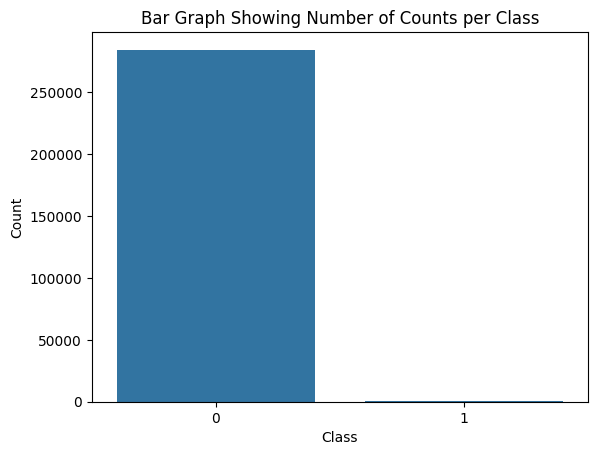

Summary of Graph based on Class:
Class
0    284315
1       492
Name: count, dtype: int64


In [5]:
plot_class_count_bar_graph("Number of Counts per Class", "Class", "Count", dataset, "Class") #helper function

##### Interpretation of the Bar Chart:
It can be observed that the dataframe is highly imbalanced with 284315 of honest transactions and 492 of fraudulent transactions. Through this relevation, we can perform several strategies to balance the dataset in an attempt to achieve accurate performance.

#### Performing Correlation Matrix

Normalize the amount column.

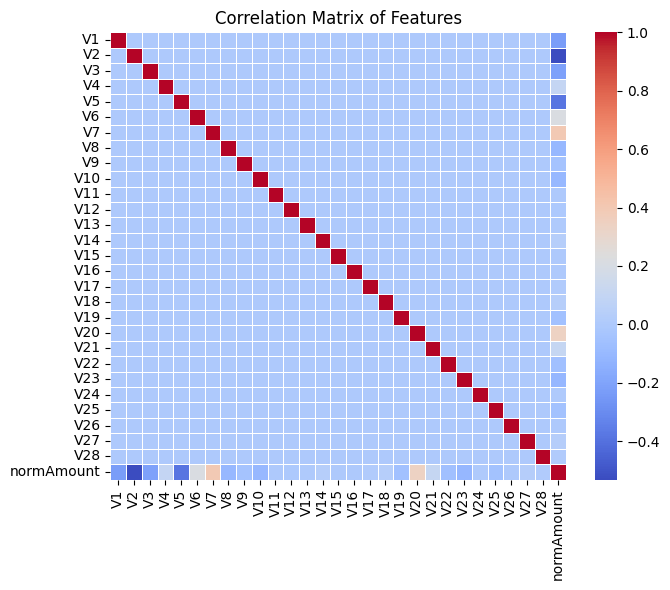

In [6]:
#normalize the column 'Amount'
dataset['normAmount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1, 1))
#dataset.head(5)

dataset = dataset.drop(['Time','Amount'],axis=1)

temp_dtable = dataset.drop(['Class'], axis=1)
correlation_matrix = temp_dtable.corr()
plt.figure(figsize=(7, 6))
#sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt=".2f",linewidths=.5) #for a larger diagram to display values
sns.heatmap(correlation_matrix,cmap='coolwarm',fmt=".2f",linewidths=.5)

plt.title('Correlation Matrix of Features')

plt.tight_layout()
plt.show()

##### Interpretation of the Correlation Matrix
- It can be observed that activties V7, V20 were more correlated to to fraud followed by V6 and V21.
- Each aspect is independent of each other, no direct correlation.
- The least correlated activities are V2, V1, V3, V5, V8, V10, V19, V22, V23 and V25.

#### Box Plot per Aspect

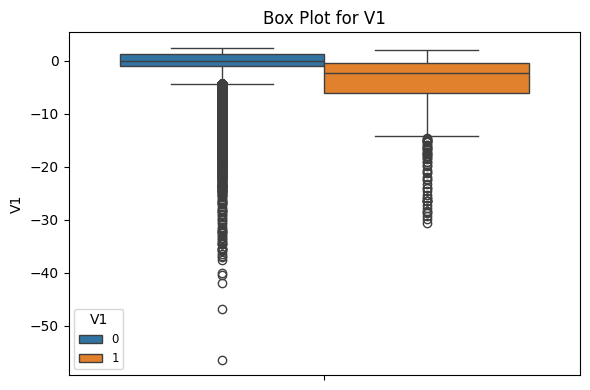

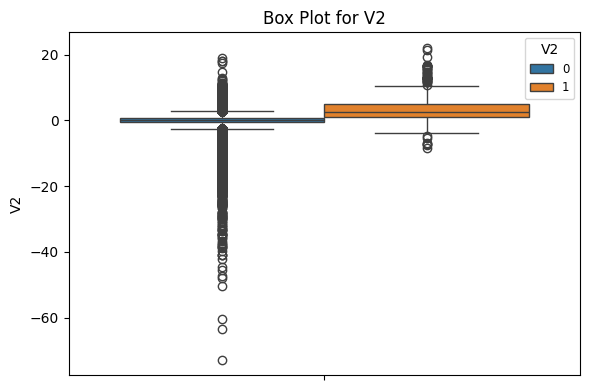

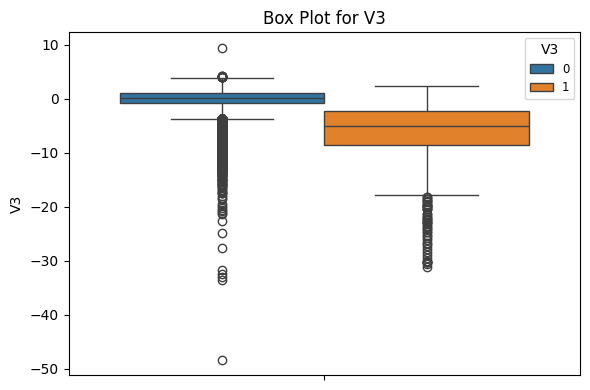

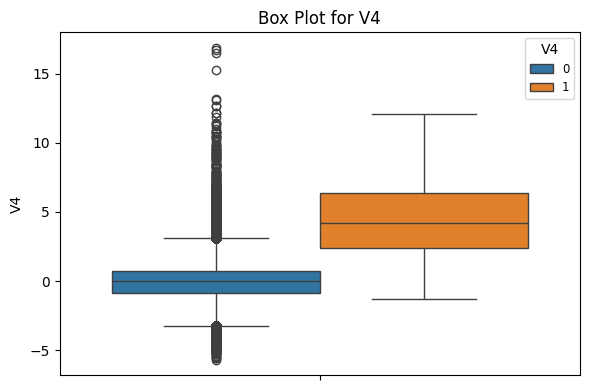

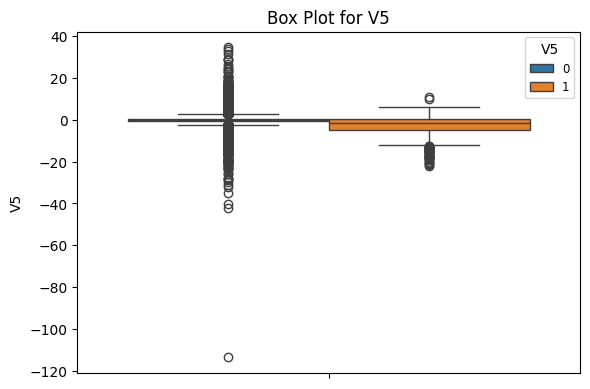

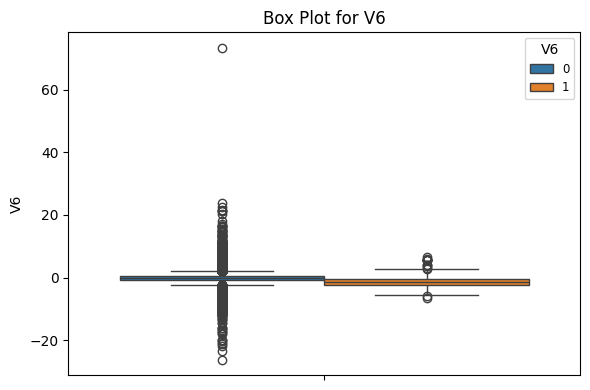

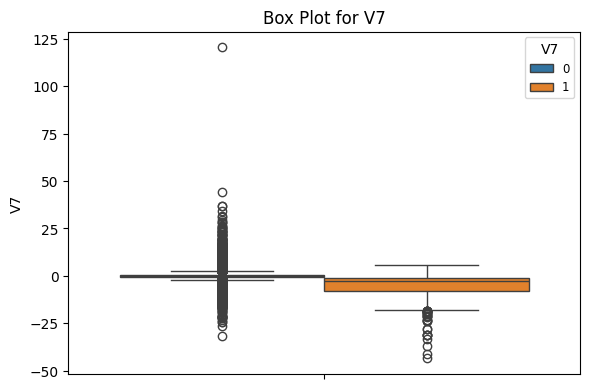

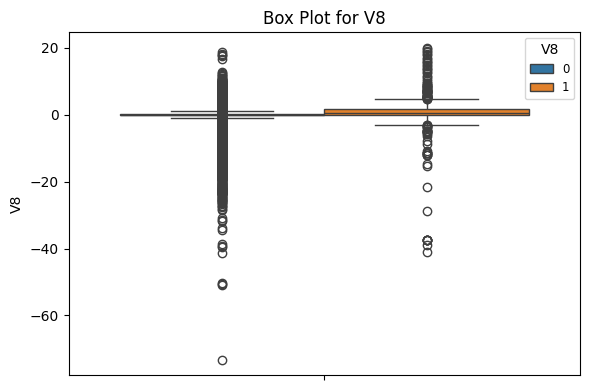

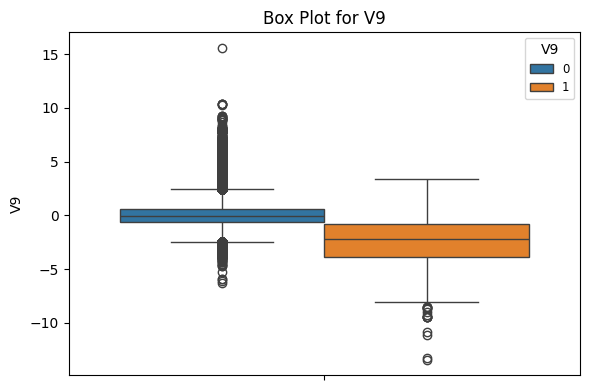

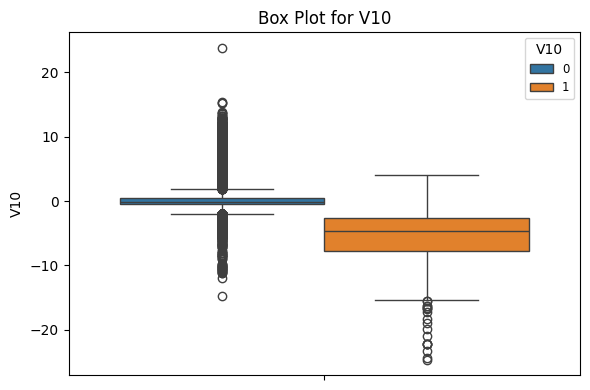

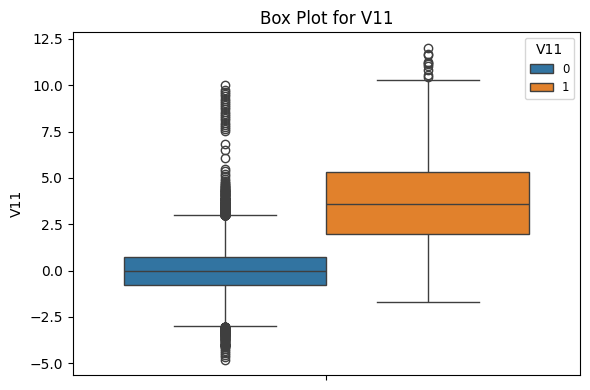

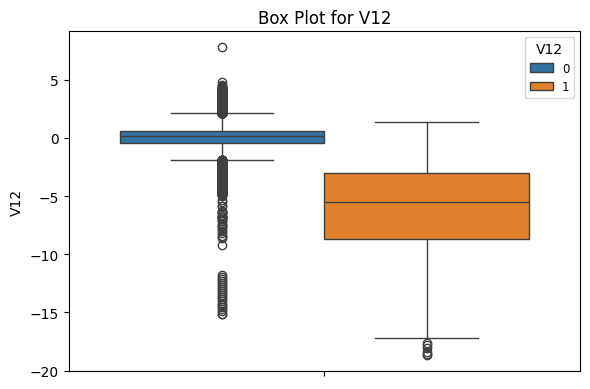

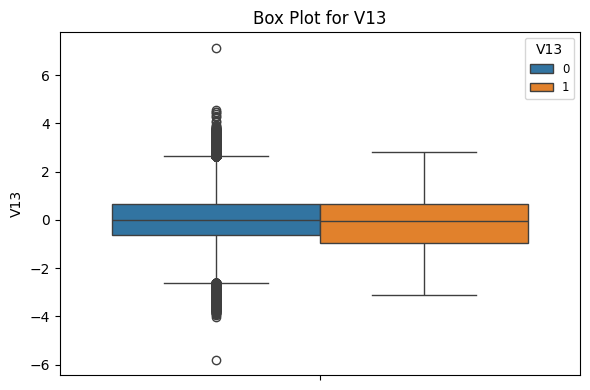

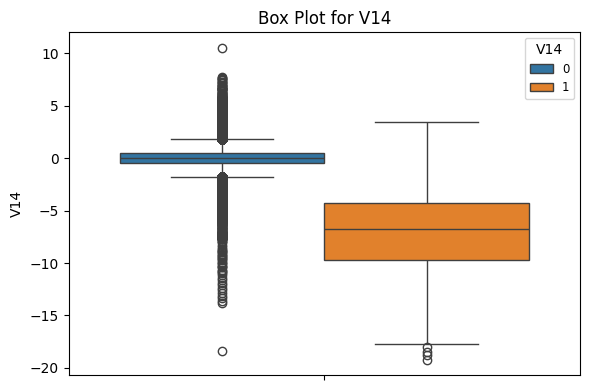

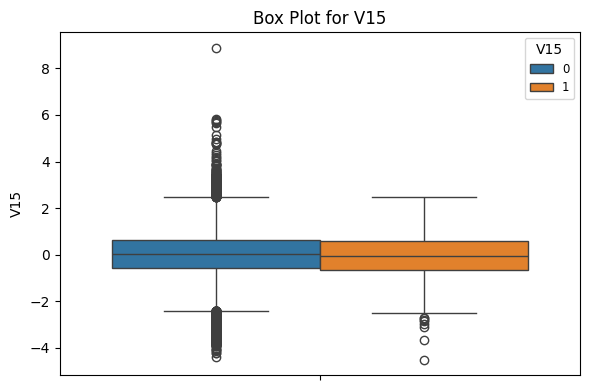

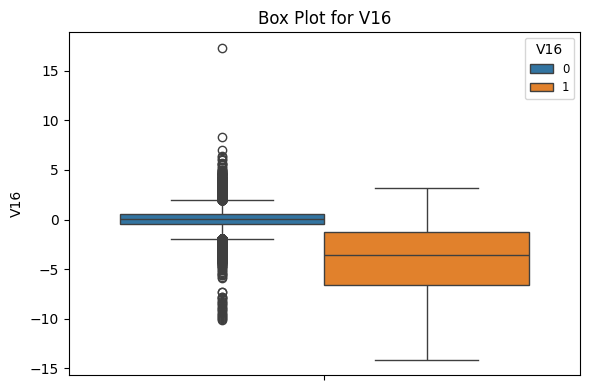

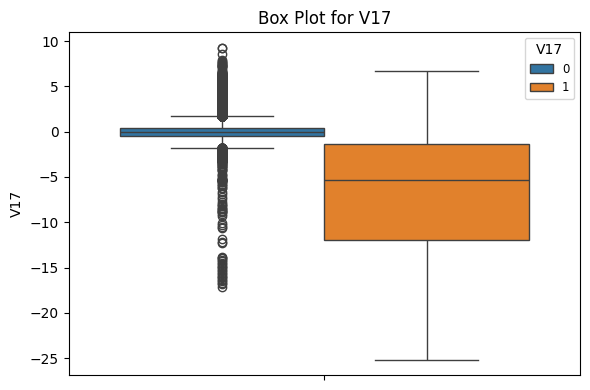

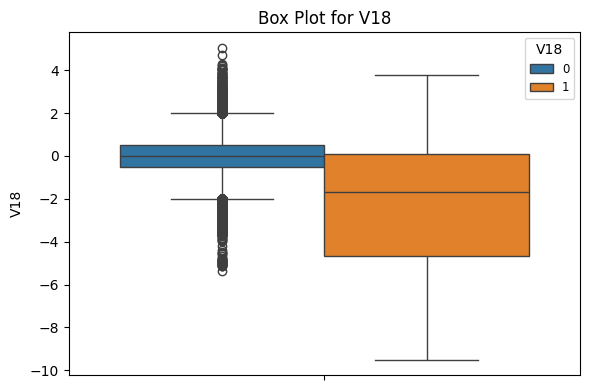

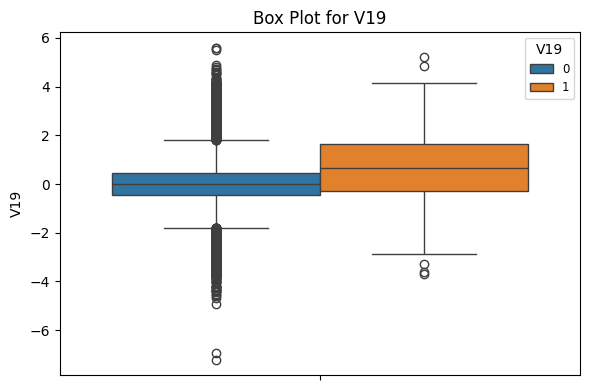

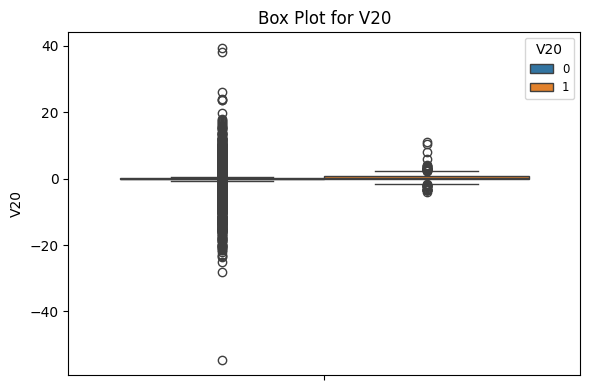

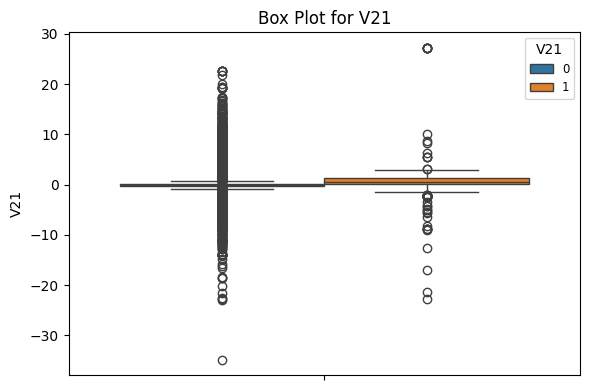

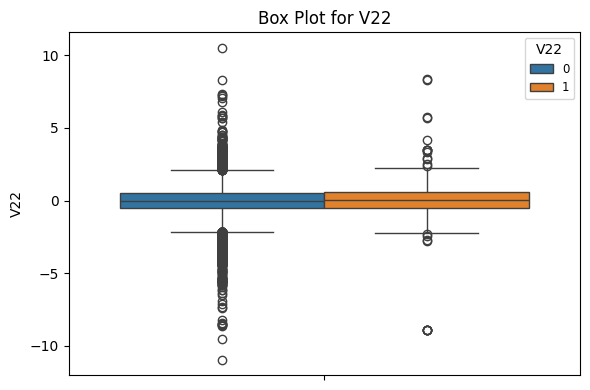

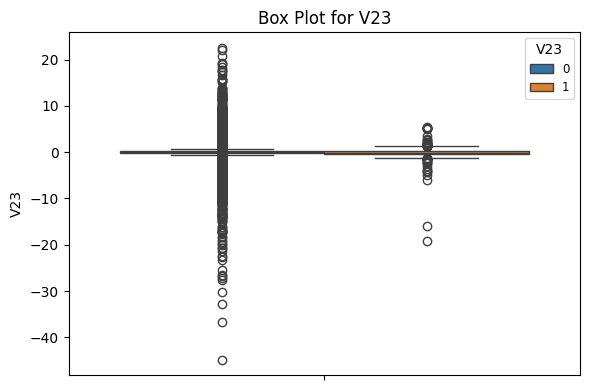

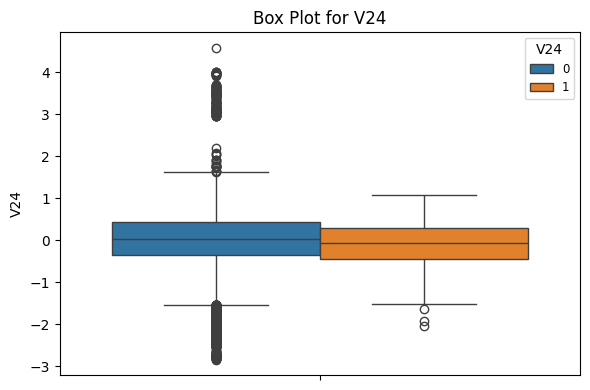

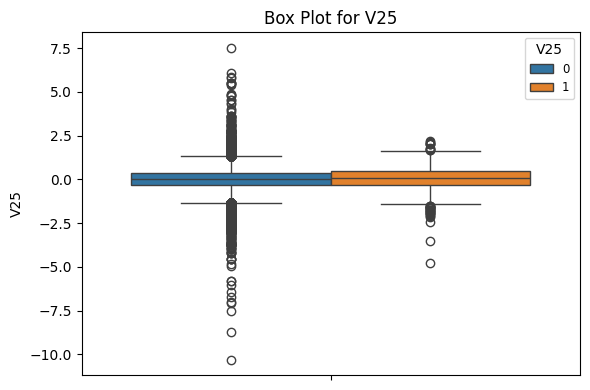

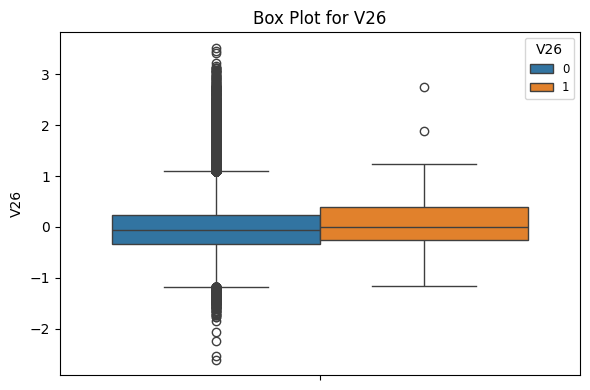

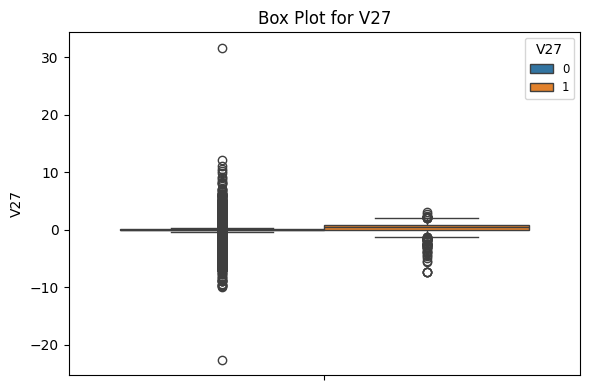

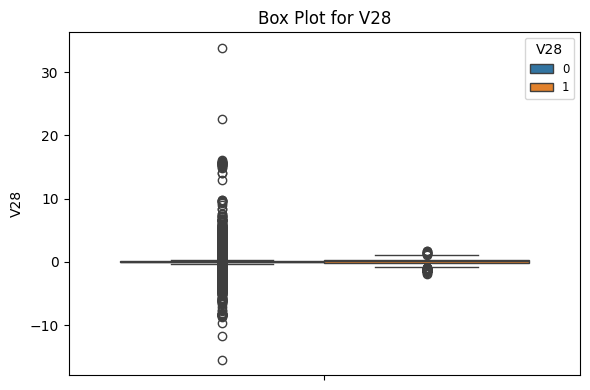

In [8]:
aspect_cols = [col for col in dataset.columns if col not in ['id', 'Class', 'normAmount']]

# Loop through each feature and plot
for aspect in aspect_cols:
    plt.figure(figsize=(6, 4))

    sns.boxplot(data=dataset, y = dataset[aspect], hue="Class")

    plt.title(f'Box Plot for {aspect}')
    plt.legend(loc='best', fontsize='small', title=aspect)
    plt.tight_layout()
    plt.show()

##### General Interpretation of the Box Plots
- It can be observed that non-fradulent aspests have little to no outliers compared to the notable fraudulent graphs for V6, V7, V20 and V21.
- Most, if not all box plots are near central around the zero mark. 